In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
columns=["id","cycle","op1","op2","op3","sensor1","sensor2","sensor3","sensor4","sensor5","sensor6","sensor7","sensor8",
         "sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16","sensor17","sensor18","sensor19"
         ,"sensor20","sensor21","sensor22","sensor23"]

In [3]:
train=pd.read_csv("Kaggle-NASA dataset/train_FD001.txt",sep=" ",names=columns)   ## to read txt into dataframe
test=pd.read_csv("Kaggle-NASA dataset/test_FD001.txt",sep=" ",names=columns)
test_result=pd.read_csv("Kaggle-NASA dataset/RUL_FD001.txt",sep=" ",header=None)

In [4]:
train.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [5]:
test_result.head()

,0,1
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN


In [6]:
test.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


In [7]:
print("machine Id:",train['id'].unique())

machine Id: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]


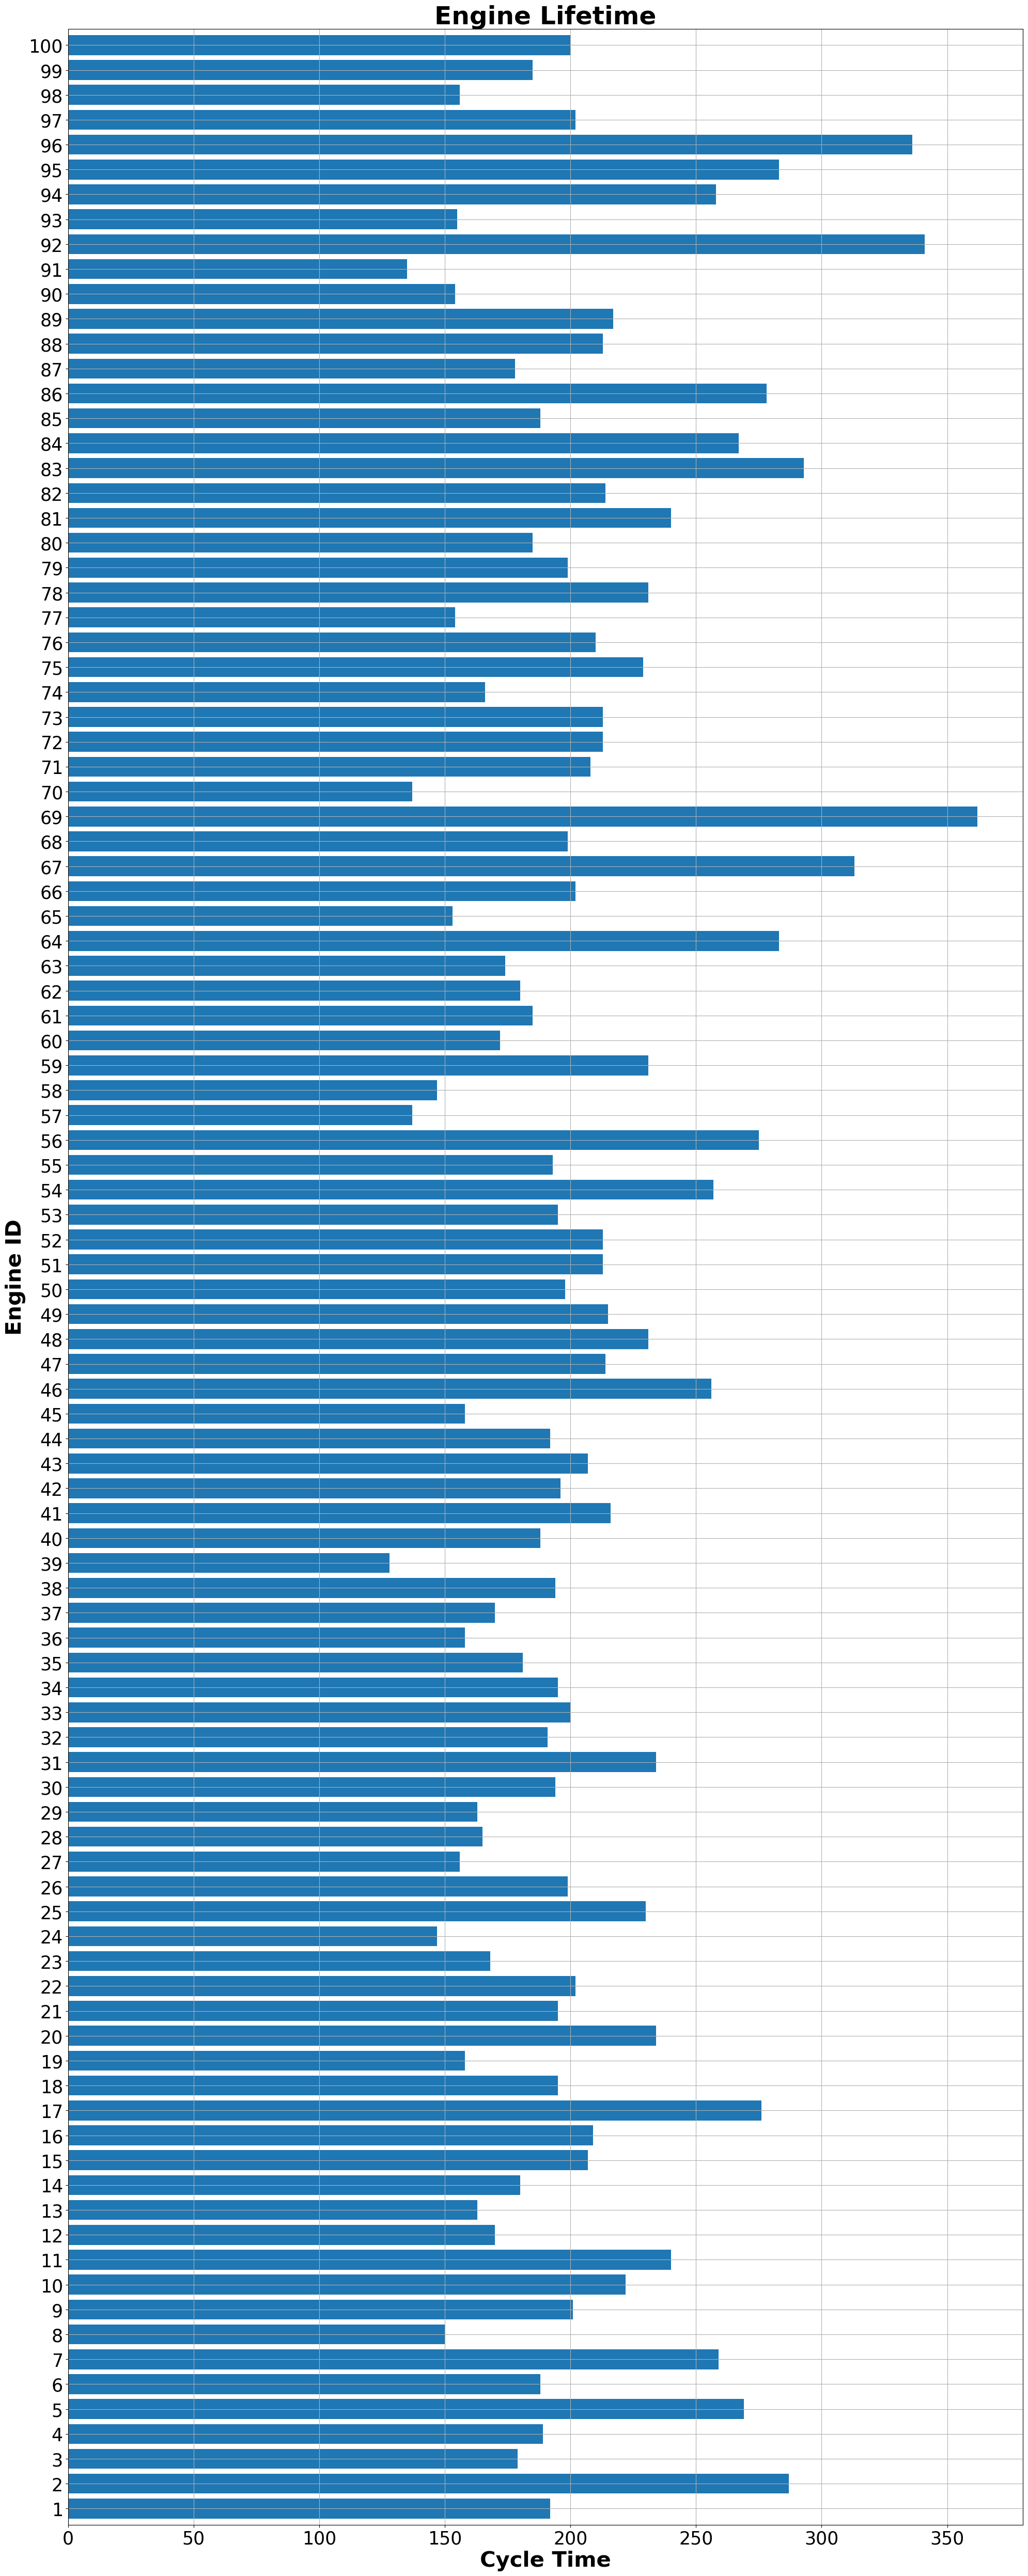

In [8]:
plt.figure(figsize=(20,50))
ax=train.groupby('id')['cycle'].max().plot(kind="barh",width=0.8,stacked=True,align='center',rot=0)
plt.title("Engine Lifetime",fontweight='bold',size=35)
plt.xlabel("Cycle Time",fontweight='bold',size=30)
plt.xticks(size=25)
plt.ylabel('Engine ID',fontweight='bold',size=30)
plt.yticks(size=25)
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
test_result.columns=["rul","null"]
test_result.head()


,rul,null
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN


In [10]:
test_result.drop(["null"],axis=1,inplace=True)
test_result["id"]=test_result.index+1
test_result.head()


,rul,id
0,112,1
1,98,2
2,69,3
3,82,4
4,91,5


In [11]:
rul=pd.DataFrame(test.groupby('id')['cycle'].max()).reset_index()
rul.columns=['id','max']

In [12]:
train.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [13]:
test_result['rul_failed']=test_result["rul"]+rul["max"]
test_result.head()

,rul,id,rul_failed
0,112,1,143
1,98,2,147
2,69,3,195
3,82,4,188
4,91,5,189


In [14]:
test_result.drop(['rul'],axis=1,inplace=True)

In [15]:
test=test.merge(test_result,on=['id'],how='left')

In [16]:
test["remaining_cycle"]=test["rul_failed"]-test["cycle"]
test.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23,rul_failed,remaining_cycle
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN,143,142
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN,143,141
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN,143,140
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN,143,139
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN,143,138


In [17]:
test.isnull().sum()

id                     0
cycle                  0
op1                    0
op2                    0
op3                    0
sensor1                0
sensor2                0
sensor3                0
sensor4                0
sensor5                0
sensor6                0
sensor7                0
sensor8                0
sensor9                0
sensor10               0
sensor11               0
sensor12               0
sensor13               0
sensor14               0
sensor15               0
sensor16               0
sensor17               0
sensor18               0
sensor19               0
sensor20               0
sensor21               0
sensor22           13096
sensor23           13096
rul_failed             0
remaining_cycle        0
dtype: int64

In [18]:
df_train=train.drop(["sensor22","sensor23"],axis=1)
df_test=test.drop(["sensor22","sensor23"],axis=1)

In [19]:
df_train["remaining_cycle"]=df_train.groupby(["id"])["cycle"].transform(max)-df_train['cycle']

In [20]:
df_train.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,remaining_cycle
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [21]:
df_test.head()


,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,rul_failed,remaining_cycle
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,143,142
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,143,141
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,143,140
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,143,139
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,143,138


In [22]:
op_set=["op"+str(i) for i in range(1,4)]
sensor=["sensor"+str(i) for i in range(1,22)]

In [23]:
cycle=30
df_train['label']=df_train["remaining_cycle"].apply(lambda x : 1 if x<=cycle else 0)
df_test['label']=df_test["remaining_cycle"].apply(lambda x : 1 if x<=cycle else 0)

/var/folders/j5/fkdpsbtx06x9pj_qxz25r4640000gn/T/ipykernel_25022/533231173.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-dark")
/Users/abhijit/tensorflow-test/env/lib/python3.8/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/abhijit/tensorflow-test/env/lib/python3.8/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/abhijit/tensorflow-test/env/lib/python3.8/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/abhijit/tensorflow-test/e

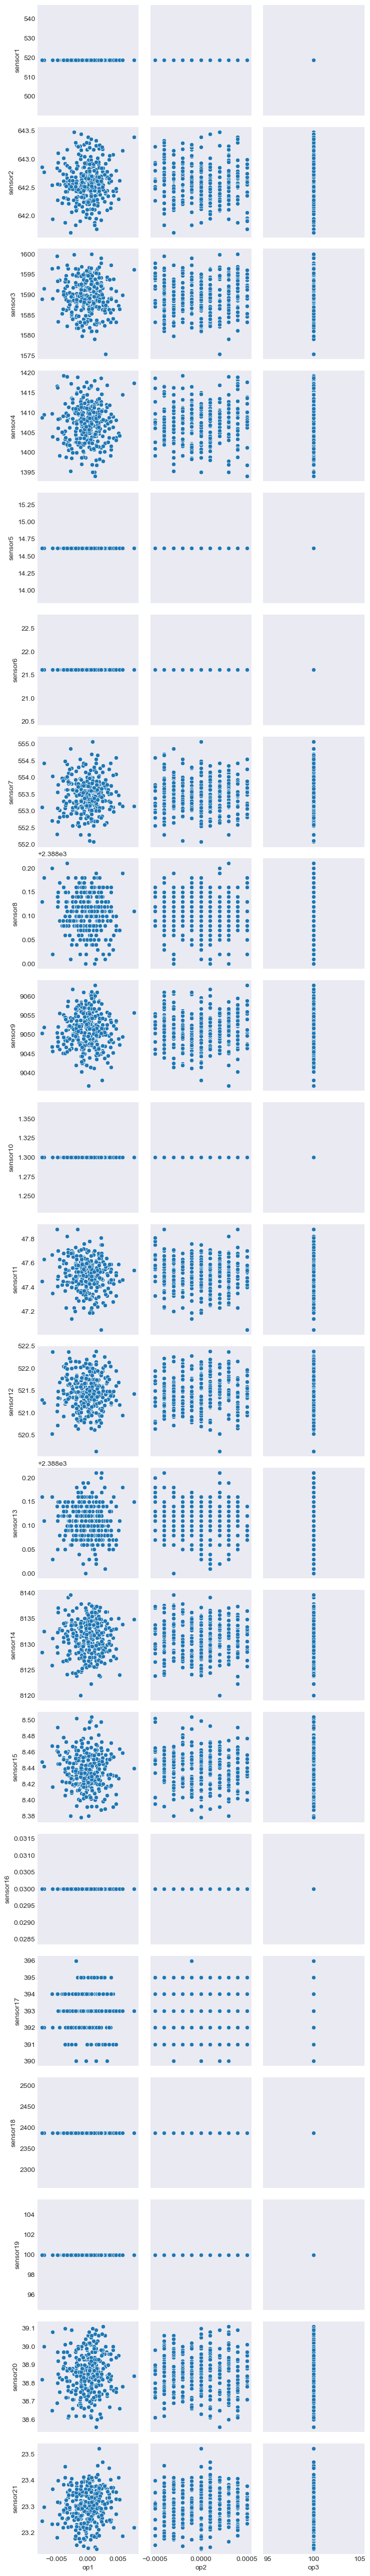

In [24]:
plt.style.use("seaborn-dark")
ax=sns.pairplot(test.query("cycle"),x_vars=op_set,y_vars=sensor,palette="hus1")

In [25]:
x=df_train.drop(["id","cycle","op3","sensor1","sensor5","sensor6","sensor10","sensor16","sensor18","sensor19","remaining_cycle","label"],axis=1)
y=df_train.label

In [26]:
df_train.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,remaining_cycle,label
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187,0


In [27]:
x=df_train.drop(["id","cycle","op3","remaining_cycle","label"],axis=1)
y=df_train.label

print('x shape :',x.shape)
print('y shape :',y.shape)

x shape : (20631, 23)
y shape : (20631,)


## ANN model

In [58]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score

In [59]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [60]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [64]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
  9/207 [>.............................] - ETA: 1s - loss: 0.5410 - accuracy: 0.7448 

2024-09-27 01:08:06.838022: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


207/207 [==============================] - ETA: 0s - loss: 0.2432 - accuracy: 0.9018

2024-09-27 01:08:08.262482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


207/207 [==============================] - 2s 7ms/step - loss: 0.2432 - accuracy: 0.9018 - val_loss: 0.1304 - val_accuracy: 0.9461
Epoch 2/10
207/207 [==============================] - 1s 6ms/step - loss: 0.1162 - accuracy: 0.9533 - val_loss: 0.3393 - val_accuracy: 0.8697
Epoch 3/10
207/207 [==============================] - 1s 6ms/step - loss: 0.1231 - accuracy: 0.9470 - val_loss: 0.1153 - val_accuracy: 0.9494
Epoch 4/10
207/207 [==============================] - 1s 6ms/step - loss: 0.1173 - accuracy: 0.9501 - val_loss: 0.1134 - val_accuracy: 0.9521
Epoch 5/10
207/207 [==============================] - 1s 7ms/step - loss: 0.1206 - accuracy: 0.9508 - val_loss: 0.1048 - val_accuracy: 0.9576
Epoch 6/10
207/207 [==============================] - 1s 7ms/step - loss: 0.1035 - accuracy: 0.9568 - val_loss: 0.1100 - val_accuracy: 0.9533
Epoch 7/10
207/207 [==============================] - 1s 6ms/step - loss: 0.1205 - accuracy: 0.9498 - val_loss: 0.1127 - val_accuracy: 0.9530
Epoch 8/10
207/20

In [69]:
# Make predictions
predictions_proba = model.predict(X_test_scaled)
predictions = (predictions_proba > 0.5).astype(int)

129/129 [==============================] - 0s 2ms/step


In [70]:
print("Accuracy score: ", accuracy_score(y_test, predictions))
print("ROC AUC score: ", roc_auc_score(y_test, predictions_proba))
print("Precision score: ", precision_score(y_test, predictions))
print("Recall score: ", recall_score(y_test, predictions))

Accuracy score:  0.9527501817300703
ROC AUC score:  0.9880649283364071
Precision score:  0.7856093979441997
Recall score:  0.916095890410959


In [71]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                1536      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 4161 (16.25 KB)
Trainable params: 4161 (16.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
# model.save('')

In [32]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
# model = Sequential([
#     Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)),
#     BatchNormalization(),
#     Dropout(0.3),
#     Dense(64, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.3),
#     Dense(32, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.3),
#     Dense(1, activation='sigmoid')
# ])

In [36]:
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# history = model.fit(
#     X_train_resampled, y_train_resampled, 
#     epochs=10, 
#     batch_size=32, 
#     validation_split=0.2, 
#     callbacks=[early_stopping, reduce_lr],
#     verbose=1
# )

Epoch 1/10
700/700 [==============================] - 8s 12ms/step - loss: 0.1651 - accuracy: 0.9335 - val_loss: 0.1538 - val_accuracy: 0.9344 - lr: 4.0000e-05
Epoch 2/10
700/700 [==============================] - 8s 11ms/step - loss: 0.1600 - accuracy: 0.9336 - val_loss: 0.1645 - val_accuracy: 0.9282 - lr: 4.0000e-05
Epoch 3/10
700/700 [==============================] - 8s 11ms/step - loss: 0.1628 - accuracy: 0.9321 - val_loss: 0.1659 - val_accuracy: 0.9278 - lr: 4.0000e-05
Epoch 4/10
700/700 [==============================] - 8s 11ms/step - loss: 0.1610 - accuracy: 0.9327 - val_loss: 0.1626 - val_accuracy: 0.9291 - lr: 4.0000e-05
Epoch 5/10
700/700 [==============================] - 8s 11ms/step - loss: 0.1617 - accuracy: 0.9336 - val_loss: 0.1548 - val_accuracy: 0.9328 - lr: 4.0000e-05
Epoch 6/10
700/700 [==============================] - 8s 11ms/step - loss: 0.1617 - accuracy: 0.9335 - val_loss: 0.1688 - val_accuracy: 0.9267 - lr: 4.0000e-05
Epoch 7/10
700/700 [====================